# Regressão Linear Simples

Análise da relação entre tamanho das propriedades e seu valor de venda. 

Buscamos um dataframe de corretagem nos EUA com o tamanho das propriedades e seu valor. A ideia é estabelecer uma equação que oconsiga estimar, apenas com essa única variável, o preço de um imóvel. Naturalmente, sabemos que vários fatores influenciam o preço, portanto se trata apenas de um exercício para fixação da metodologia.  

## Importando as libs necessárias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

C:\Users\georgev\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Carregando os dados

In [5]:
data = pd.read_csv('d:/real_estate_price_size.csv')
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


## Analisando os dados

Utilizando o atributo *describe*, observamos que não há dados faltantes e que os valores mínimos e máximos estão coerentes, descartando a existência de outliers. É, portanto um dataframe pronto para trabalhar.

In [7]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


## Criando a regressão

Regressão é uma estimativa de valor numa relação **causal** entre duas ou mais variáveis. A regressão mais básica que existe, e que será aplicada aqui, é a *regressão linear simples*, onde há apenas uma variável dependente. É necessários que haja uma correlação entre as variávies para que seja possível haver a correlação. 

Assim, neste ordem, iremos estabelecer as variáveis dependentes (a que se deseja prever) e a variável independente (a que irá exercer influência:

### Estabelecendo as variáveis dependente e independente

In [8]:
y = data['price']
x1 = data['size']

### Plotando o gráfico das variáveis:

Para observar, de forma intuituva se existe uma correlação (posteriormente vamos demonstrar em valores), é importante plotar um gráfico de dispersão (scatter, em inglês) para observarmos a posição dos valores se tendem a uma reta e se há outlliers.

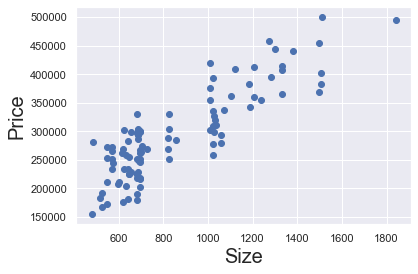

In [9]:
plt.scatter(x1,y)
plt.xlabel('Size',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

No gráfico acima, se percebe a forte correlação e tendência para uma reta. Mas qual a equação representaria esse gráfico? qual a linha que melhor indica a regressão linear?
a função OLS (Ordinary Least Squares) é uma técnica de otimização que busca o melhor ajuste do modelo através da minimização dos quadrados do erro da regressão. 

### Parâmetros da Regressão

Vamos criar um sumário com a função OLS acima conceituada:

In [10]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           8.13e-31
Time:                        14:59:28   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Analisando o quadro acima, obtemos o coeficiente da variável independente (size) que é 223,1787, ou seja, nea equação ax+b, o valor de "a" é esse coeficiente.

O valor de b é a constante, o *bias*, a diferença média dos quadrados do valor observado x o valor obtido. No caso acima, 101900. 
Definindo então *yhat*, ou seja, o valor projetado para este dataframe, obteríamos o seguinte gráfico:

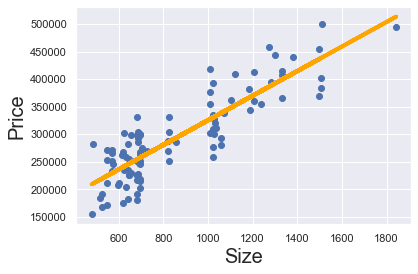

In [11]:
plt.scatter(x1,y)
yhat = x1*223.1787+101900
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Size', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.show()

## Conclusão

O valor de R-squared demonstra q forte correlação entre as variáveis. O valor obtido foi 0,745 numa escala de 0 a 1, onde 1 é a máxima aderência de seu modelo. O valor desejável varia de acordo com seu propósito, mas acima de 0,5 para este caso já é considerado um bom modelo. 

Case desejemos incluir novas variáveis ao Data Frame, precisamos observar o comportamento do R-Square e do R-square ajustado, para saber se o acréscimo de variáveis está de fato ajudando no modelo preditivo. Caso não cresça ou pior, reduza, a variável nova deve ser descartada.